<a href="https://colab.research.google.com/github/srkpriyanka95/Corona-Tweet-Sentiment-Analysis/blob/main/Corona_virus_tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Corona Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Sentiment Analysis is a process of computationally determining the underlying sentiment from the piece of textual information. Sentiment Analysis is widely used in different industries to understand customers' opinions about the firm's activities, such as product launches, marketing campaigns, etc. In this project, we are doing sentiment analysis on coronavirus tweets for one month.

In this project, the dataset contains six features and  41157 observations. The dependent variable is the sentiment column with values such as Extremely Positive, Positive, Neutral, Negative, and Extremely Negative. The dependent column is the Original Tweet column, whereas other features don't have much importance for the analysis.

The different steps involved in this sentiment analysis project are,
Exploratory Data Analysis
Text Preprocessing
>>>* Tokenization
* Removing patterns, stop words, and punctuation
* Normalization
* Vectorization
* Data Splitting
* Data Scaling
* Model Implementation



---


**Exploratory Data Analysis**
 	In EDA, we will deal with the missing and duplicates in the dataset. We look deeper into the variables and their relationships with each other.


---



**Text Preprocessing**
>>> * **Tokenization** - Tokenization is the first step in any Natural Language Processing Project. It is the process of converting unstructured data into chunks.
* **Removing patterns, stop words & punctuations** - Removing stopwords and punctuation is the next step. We don't need a Twitter user handle in the original tweet column in sentiment classification. So, we remove all the unwanted information through regular expressions in python.
* **Normalization** - Normalization in NLP is converting the words to their base words. There are two different types of normalization, namely stemming and lemmatization.
* **Vectorization** - Vectorization is the step where all the words get converted into numbers. Because machine learning algorithms don't understand text data. There are different types of vectorizers such as Count Vectorizer, Tfidf, ngrams, word embedding, word2vec, etc.,
---
**Data Splitting**

In data splitting, we split the dataset into training data and testing data on a chosen ratio. The training data is applied to train the machine learning models, and test data is employed to check the performance of the data over unseen test data.

---

**Model Implementation**

In this project, we use machine-learning models such as Logistic Regression, Random Forest Classifiers, Support Vector Classifiers, Decision Tree Classifiers, and SGD Classifiers.

---




# **GitHub Link -**

https://github.com/srkpriyanka95/Corona-Tweet-Sentiment-Analysis.git

# **Problem Statement**


**Write Problem Statement Here.**

> Indented block



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud,STOPWORDS

# Importing regular expression 
import re

# importing sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# importing smote to handle imbalances
from imblearn.over_sampling import SMOTE

# importing sklearn classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# importing spacy package
import spacy
nlp=spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Installing contractions library to expand words
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Dataset0
data=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Covid Tweet Sentiment Analysis/Coronavirus Tweets.csv",encoding='latin_1')

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(41157, 6)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

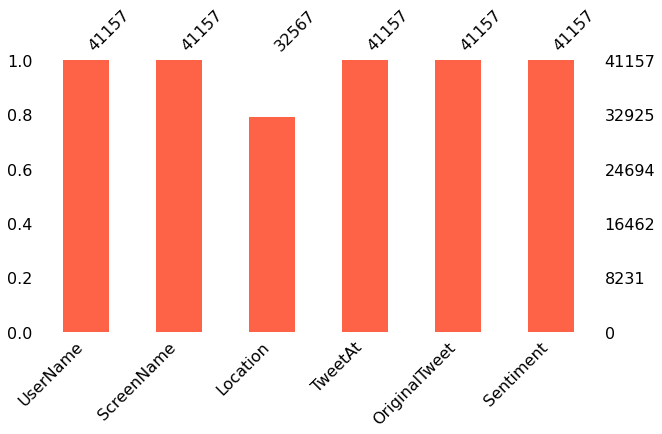

In [10]:
# Visualizing the missing values
msno.bar(data,figsize=(10,5),color='tomato')


### What did you know about your dataset?

* The dataset contains 41157 observations and 6 features.
* There are no duplicated data in the dataset.
* There are two different data types. They are,
>> * int
>> *  object.
* The location column has 8590 missing values. No other column has any missing values.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [13]:
# Dataset describe for Categorical columns
data.describe(include='O')

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,540,3448,1,11422


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [15]:
# Checking for unique values in Sentiment column
print(data.Sentiment.unique())


['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [16]:
# Unique Values of TweetAt Column
print(data.TweetAt.unique())

['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']


## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [17]:
# Creating functions for visualization

# Creating a function to annotate
def annotate(ax):
  for n in ax.patches:
    ax.annotate(int(n.get_height()),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=14)

# Creating a function to set figure size
def figsize(x=12,y=8):
  plt.figure(figsize=(x,y))

# Creating a function to set set title and label
def label_title(t,x=None,y=None,z=None):
  t.set_title(x,fontsize=20)
  t.set_xlabel(y,fontsize=15)
  t.set_ylabel(z,fontsize=15)



#### **Chart - 1 Sentiments and their Count Plot**

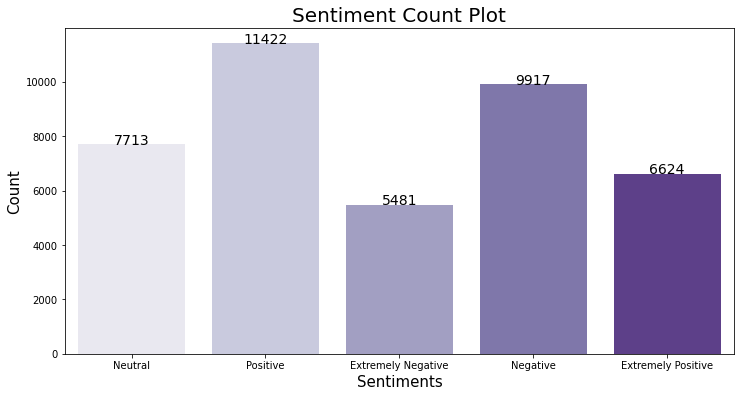

In [18]:
# Chart - 1 visualization code
figsize(12,6)
sent = sns.countplot(x=data['Sentiment'],palette='Purples')
label_title(sent,'Sentiment Count Plot','Sentiments','Count')
annotate(sent)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2 Top 10 Locations with Higher Number of Tweets**

In [19]:
# Creating a seperate data frame for locations and their counts
location_count = data.Location.value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'})
# Displaying the top 15 locations based on their counts
location_count.head(15)

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


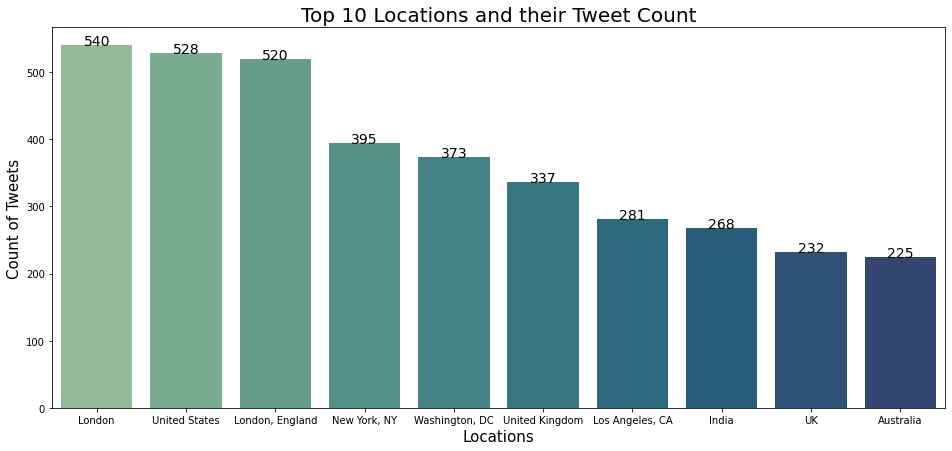

In [20]:
# Visualization plot for Location
figsize(16,7)
loc=sns.barplot(data=location_count[:10],x='Location',y='Count',palette='crest')
annotate(loc)
label_title(loc,'Top 10 Locations and their Tweet Count', 'Locations','Count of Tweets')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3 Different Months and their Tweet Count**

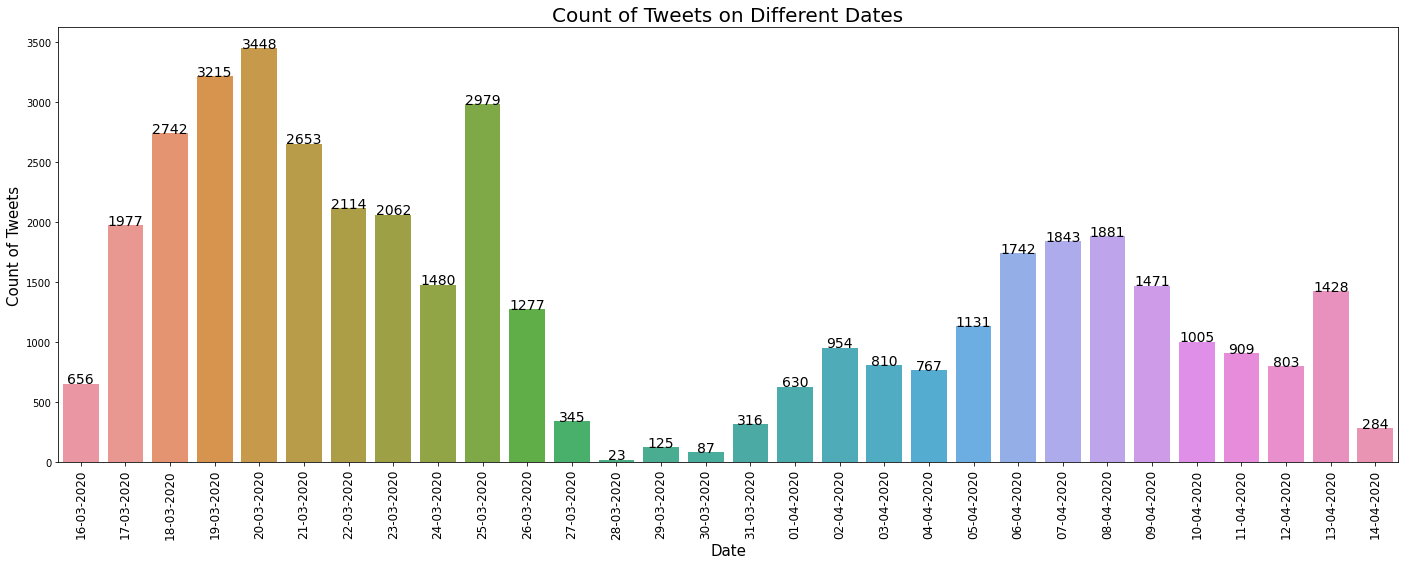

In [21]:
# Chart - 3 visualization code 
figsize(24,8)
day_tweet=sns.countplot(x=data['TweetAt'])
annotate(day_tweet)
label_title(day_tweet,'Count of Tweets on Different Dates','Date','Count of Tweets')
plt.xticks(rotation=90,fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4 Count of Positive Tweets on Different Dates**

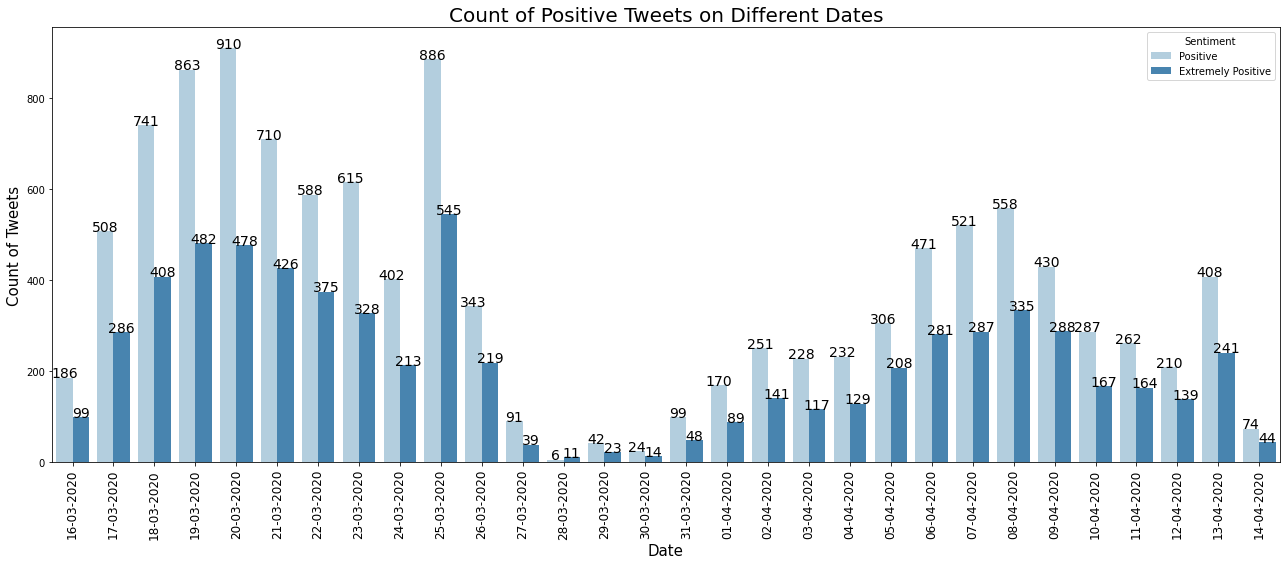

In [22]:
# Chart - 4 visualization code
figsize(22,8)
positive_tweet=sns.countplot(x=data.query('Sentiment == "Positive" or Sentiment == "Extremely Positive"')['TweetAt'],hue=data['Sentiment'],hue_order=['Positive','Extremely Positive'],palette='Blues')
label_title(positive_tweet,'Count of Positive Tweets on Different Dates','Date','Count of Tweets')
annotate(positive_tweet)
plt.xticks(rotation=90,fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

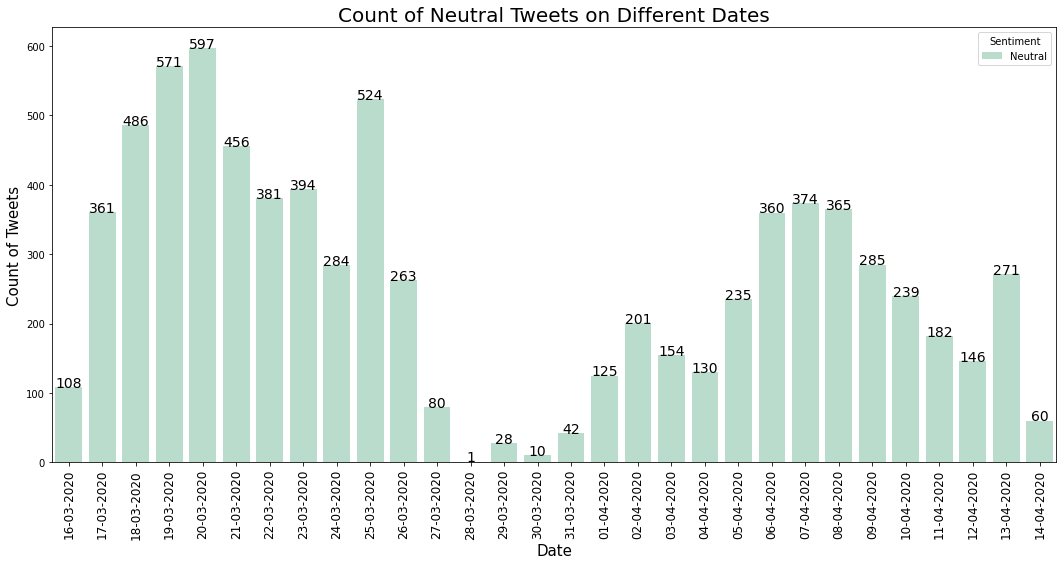

In [23]:
# Chart - 5 visualization code
# Chart - 4 visualization code
figsize(18,8)
neutral_tweet=sns.countplot(x=data.query('Sentiment == "Neutral"')['TweetAt'],hue=data.query('Sentiment == "Neutral"')['Sentiment'],palette='Pastel2')
label_title(neutral_tweet,'Count of Neutral Tweets on Different Dates','Date','Count of Tweets')
annotate(neutral_tweet)
plt.xticks(rotation=90,fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 6 Count of Negative Tweets**

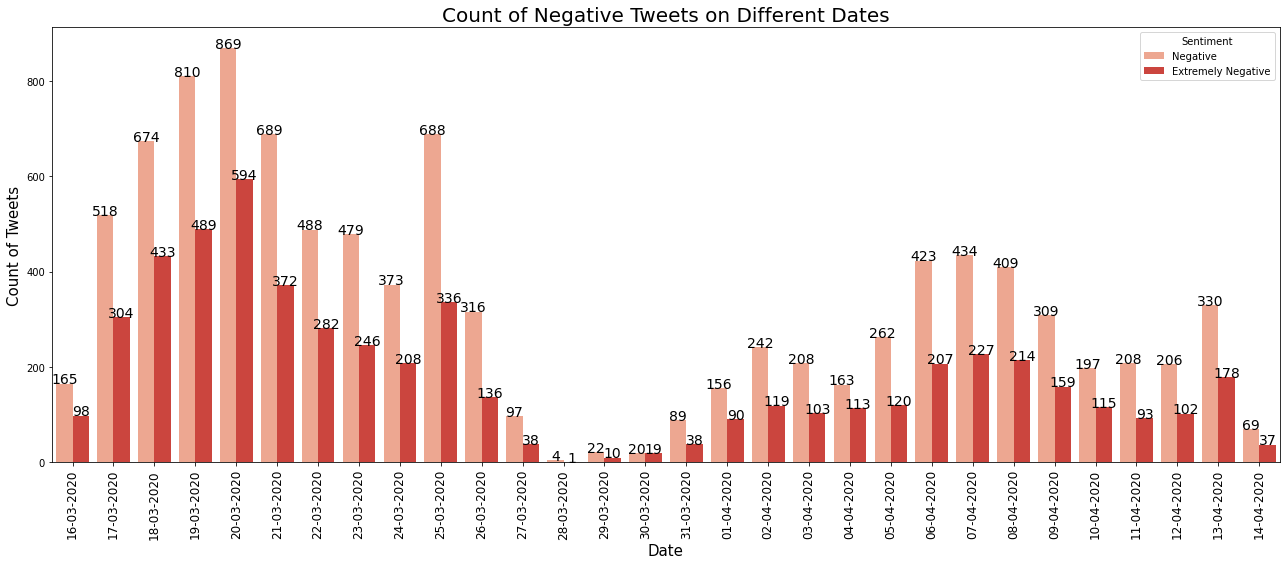

In [24]:
# Chart - 6 visualization code
figsize(22,8)
negative_tweet=sns.countplot(x=data.query('Sentiment == "Negative" or Sentiment == "Extremely Negative"')['TweetAt'],hue=data['Sentiment'],hue_order=['Negative','Extremely Negative'],palette='Reds')
label_title(negative_tweet,'Count of Negative Tweets on Different Dates','Date','Count of Tweets')
annotate(negative_tweet)
plt.xticks(rotation=90,fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [25]:
sent

#### Chart - 7

In [26]:
# Chart - 7 visualization code

def wordcloud(x):
  sep=data[data['Sentiment'] == x]['OriginalTweet'].apply(lambda x:x.lower())
  sentence = ' '.join(word for word in sep)
  wordc = WordCloud(width=1000, height=500,background_color ='White').generate(sentence)
  figsize(15,6)
  plt.imshow(wordc,interpolation='bilinear')
  plt.axis("off")
  plt.show()

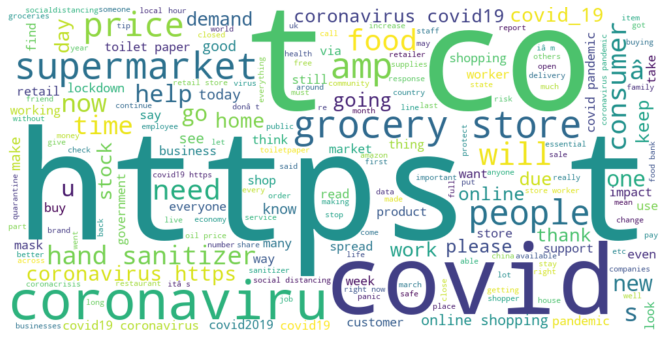

In [27]:
wordcloud('Positive')

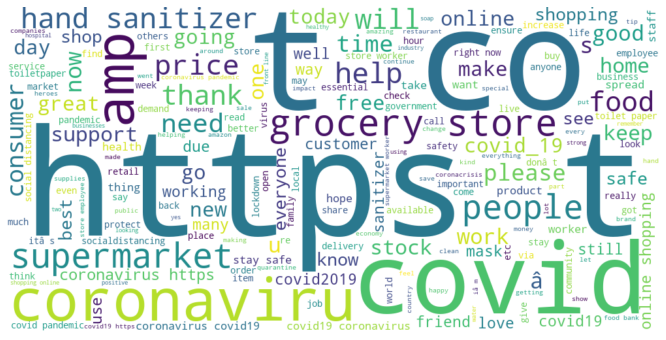

In [28]:
wordcloud('Extremely Positive')

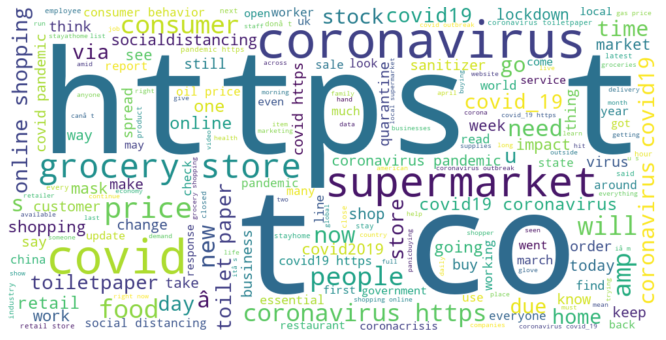

In [29]:
wordcloud('Neutral')

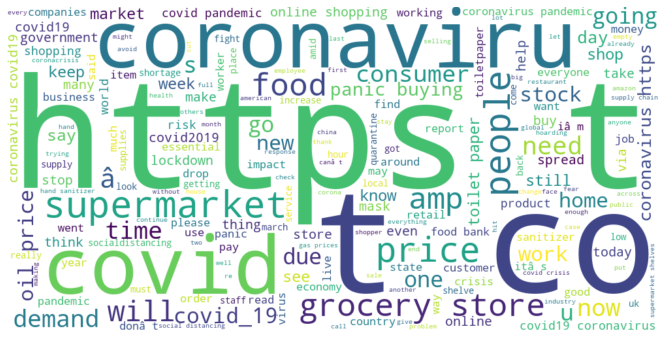

In [30]:
wordcloud('Negative')

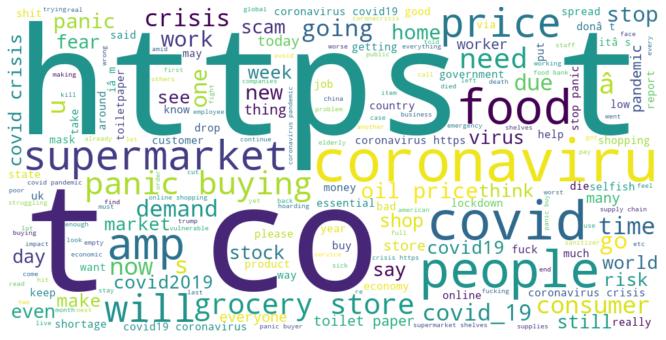

In [31]:
wordcloud('Extremely Negative')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [32]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [33]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [34]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [35]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [36]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [37]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [38]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [39]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing 


#### 1. Expand Contraction

In [40]:
# Expand Contraction
data['altered_tweet']=data['OriginalTweet'].apply(lambda x:contractions.fix(x))

In [41]:
# Creating a function to check for changes
def check(num):
  return print(f"Original : {data['OriginalTweet'].iloc[num]}\n\nALtered Data : {data['altered_tweet'].iloc[num]}")


In [42]:
# Checking whether the changes are made
check(13)



Amazon: https://t.co/8YWaKFjExC



Amazon: https://t.co/8YWaKFjExC


#### 2. Lower Casing

In [43]:
# Lower Casing
data['altered_tweet']=data['altered_tweet'].apply(lambda x: x.lower())

In [44]:
# Checking whether the changes are made
check(10)

Original : All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9

ALtered Data : all month there has not been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #philippines https://t.co/hxws9lanf9


#### 3. Removing URLs & Removing words and digits contain digits.

In [45]:
# writing a function to remove unwanted characters

def remove_char(input,char_pattern):
  input_altered = re.sub(char_pattern,"",input)
  return input_altered

In [46]:
# Removing hashtags, twitter handles, website and white spaces url from the tweet

data['altered_tweet']=data['OriginalTweet'].apply(lambda x: remove_char(x,"#\w*|@\w*|\w+:\S+|[?\r\n\t_-]+|Â|^ *| +$"))

# Removing white spaces
data['altered_tweet'] = data['altered_tweet'].replace('  ',' ')

In [47]:
# Let's check for the changes
check(12)

Original : #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh

ALtered Data :  is a caring community. Lets ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. 


#### 4. Removing Punctuations & stop words

In [48]:
# Creating a function to remove stop words
def punc_and_stop(x):
  text=nlp(x)
  new_text = [token.text for token in text if not token.is_stop and not token.is_punct]
  return " ".join(new_text)

# Remove Punctuations and stop words
data['altered_tweet']=data['altered_tweet'].apply(lambda x: punc_and_stop(x))

In [49]:
# It's time for cheking
check(50)

Original : "Everything weÂre seeing in the current COVID-19 outbreak has been seen before in previous epidemics and pandemics; the rise of fear, racism, panic buying of food and medicines, conspiracy theories, the proliferation of quack cures" https://t.co/Pr8NpKX41A

ALtered Data : seeing current COVID19 outbreak seen previous epidemics pandemics rise fear racism panic buying food medicines conspiracy theories proliferation quack cures


#### 5. Tokenization

In [50]:
#Tokenization
data['altered_tweet']=data['altered_tweet'].apply(lambda x:nlp(x))
data['altered_tweet']=data['altered_tweet'].apply(lambda x: [token for token in x])

In [51]:
check(18)



 https://t.co/TbzZ2MC3b3

ALtered Data : [Amazon, Glitch, Stymies, Foods, Fresh, Grocery, DeliveriesÂAs, COVID19, spread, ve, seen, significant, increase, people, shopping, online, groceries, Â, spokeswoman, said, statement, ÂToday, resulted, systems, impact, affecting]


#### 8. Text Normalization

In [52]:
# Normalizing Text - Lemmatization 
def lemma(x):
  new_text = [token.lemma_ for token in x]
  return " ".join(new_text)


data['altered_tweet']=data['altered_tweet'].apply(lambda x: lemma(x))



In [53]:
# Let's have a look at the converted text
check(898)

Original : @MichelCombes @sprint It is concerning that retail employees are forced to work amidst the severity of covid-19.Reduced hours will not deter from viruses spreading.Only one person coming in with covid can affect all employees working as well as customers 

ALtered Data :     concern retail employee force work amidst severity covid19.reduce hour deter virus spread person come covid affect employee work customer


##### Which text normalization technique have you used and why?

Answer Here.

### 3. Categorical Encoding

In [54]:
#Creating seperate labels for the target variable
data['Sentiment'].replace({'Neutral':0,'Positive':1,'Extremely Positive':2,'Negative':3,'Extremely Negative':4},inplace=True)
# Let's look for unique values in the sentiment column
data.Sentiment.unique() 

array([0, 1, 4, 3, 2])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 8. Data Splitting

In [55]:
# splitting the dependent and independent variables
x = data['altered_tweet']
y= data['Sentiment']

In [56]:
# train and test data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=24,test_size=0.2,stratify=y)

# checking the shape of the shape of train and test data
print(x_train.shape,x_test.shape)

(32925,) (8232,)


#### 10. Text Vectorization

In [57]:
# Vectorizing Text
vector=TfidfVectorizer()
x_train_vector=vector.fit_transform(x_train)
x_test_vector=vector.transform(x_test)

##### Which text vectorization technique have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [58]:
# Checking Whether there is an imbalance
y_train.value_counts()

1    9137
3    7934
0    6170
2    5299
4    4385
Name: Sentiment, dtype: int64

In [59]:
#x_smote,y_smote=SMOTE().fit_resample(x_train_vector , y_train)

In [60]:
# Let's have a look at the changes
#y_smote.value_counts()

In [61]:
# Let's check the shape before and after the smote application
#print(f'Before: {x_train_vector.shape}\nAfter : {x_smote.shape}')

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [62]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 6. Data Scaling

In [63]:
# Scaling your data
scaler = MaxAbsScaler()
x_train_scaled= scaler.fit_transform(x_train_vector)
x_test_scaled= scaler.fit_transform(x_test_vector)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

In [64]:
# Creating a function to implement ML models
def model(model):
  classifier = model.fit(x_train_scaled,y_train)
  print(f'-------    classification report - Train data     ---------\n')
  print(classification_report(model.predict(x_train_scaled),y_train))
  print(f'-------    classification report - Test data     ---------\n')
  print(classification_report(model.predict(x_test_scaled),y_test))
  fig, ax = plt.subplots(figsize=(8,8))
  ConfusionMatrixDisplay.from_estimator(model,x_test_scaled,y_test,colorbar=False,cmap='Blues_r',ax=ax)
  plt.show()



### **ML Model - 1 Logisitic Regression**

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      6140
           1       0.91      0.88      0.89      9490
           2       0.90      0.92      0.91      5138
           3       0.89      0.89      0.89      7911
           4       0.89      0.92      0.91      4246

    accuracy                           0.90     32925
   macro avg       0.90      0.91      0.90     32925
weighted avg       0.90      0.90      0.90     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1492
           1       0.52      0.53      0.53      2256
           2       0.67      0.58      0.62      1526
           3       0.51      0.52      0.52      1943
           4       0.58      0.62      0.60      1015

    accuracy                           0.58      8232
   macro a

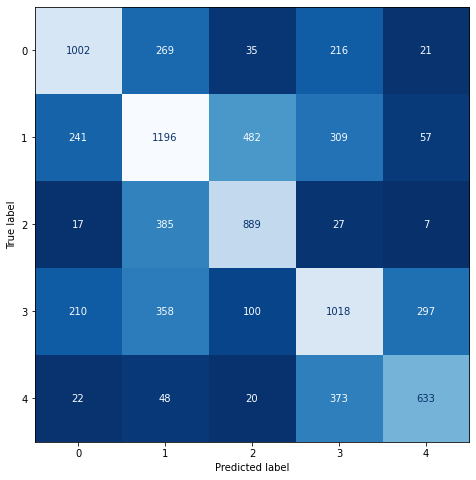

In [65]:
lr=LogisticRegression(random_state=10,max_iter=500)
model(lr)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML **Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6179
           1       1.00      1.00      1.00      9135
           2       1.00      1.00      1.00      5299
           3       1.00      1.00      1.00      7926
           4       1.00      1.00      1.00      4386

    accuracy                           1.00     32925
   macro avg       1.00      1.00      1.00     32925
weighted avg       1.00      1.00      1.00     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      2534
           1       0.55      0.47      0.51      2696
           2       0.32      0.68      0.44       629
           3       0.46      0.50      0.48      1823
           4       0.34      0.68      0.46       550

    accuracy                           0.52      8232
   macro a

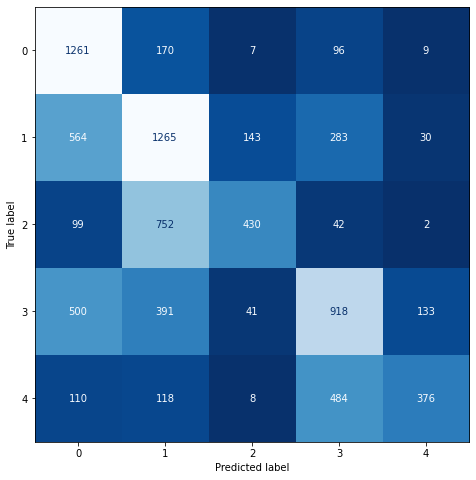

In [68]:
# Visualizing evaluation Metric Score chart
model(RandomForestClassifier())

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      3472
           1       0.94      0.59      0.72     14477
           2       0.56      0.95      0.71      3152
           3       0.82      0.69      0.75      9392
           4       0.53      0.96      0.68      2432

    accuracy                           0.72     32925
   macro avg       0.68      0.83      0.71     32925
weighted avg       0.79      0.72      0.72     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.24      0.66      0.35       565
           1       0.72      0.38      0.50      4291
           2       0.22      0.58      0.32       510
           3       0.52      0.40      0.45      2541
           4       0.20      0.66      0.30       325

    accuracy                           0.43      8232
   macro a

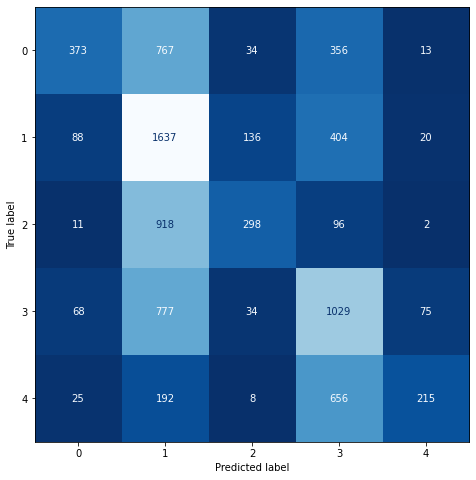

In [69]:
model(MultinomialNB())

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      6655
           1       0.79      0.88      0.84      8213
           2       0.92      0.81      0.86      6042
           3       0.78      0.88      0.83      7066
           4       0.92      0.82      0.87      4949

    accuracy                           0.85     32925
   macro avg       0.87      0.85      0.85     32925
weighted avg       0.86      0.85      0.85     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      1694
           1       0.36      0.52      0.43      1596
           2       0.77      0.50      0.61      2019
           3       0.40      0.51      0.45      1535
           4       0.69      0.55      0.61      1388

    accuracy                           0.54      8232
   macro a

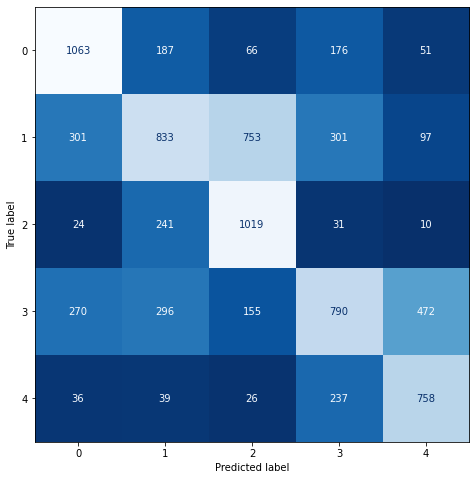

In [70]:
model(SGDClassifier())

In [77]:
from sklearn.tree import DecisionTreeClassifier

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6179
           1       1.00      1.00      1.00      9135
           2       1.00      1.00      1.00      5299
           3       1.00      1.00      1.00      7928
           4       1.00      1.00      1.00      4384

    accuracy                           1.00     32925
   macro avg       1.00      1.00      1.00     32925
weighted avg       1.00      1.00      1.00     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      2038
           1       0.41      0.42      0.41      2265
           2       0.42      0.52      0.46      1088
           3       0.39      0.40      0.39      1944
           4       0.39      0.48      0.43       897

    accuracy                           0.44      8232
   macro a

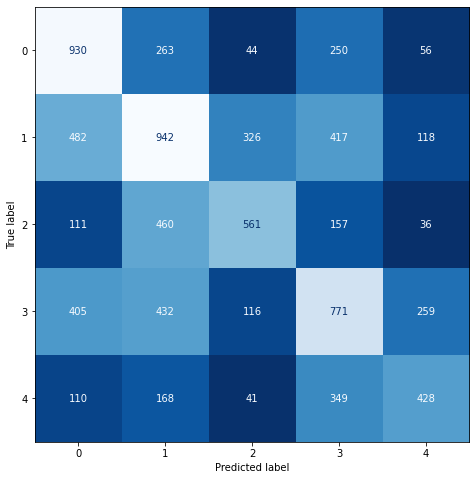

In [78]:
model(DecisionTreeClassifier())

-------    classification report - Train data     ---------

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6125
           1       0.97      0.92      0.95      9618
           2       0.92      0.98      0.95      4994
           3       0.95      0.94      0.95      8015
           4       0.93      0.98      0.95      4173

    accuracy                           0.95     32925
   macro avg       0.94      0.95      0.95     32925
weighted avg       0.95      0.95      0.95     32925

-------    classification report - Test data     ---------

              precision    recall  f1-score   support

           0       0.47      0.80      0.59       911
           1       0.69      0.49      0.58      3212
           2       0.58      0.69      0.63      1118
           3       0.60      0.52      0.56      2296
           4       0.48      0.75      0.58       695

    accuracy                           0.58      8232
   macro a

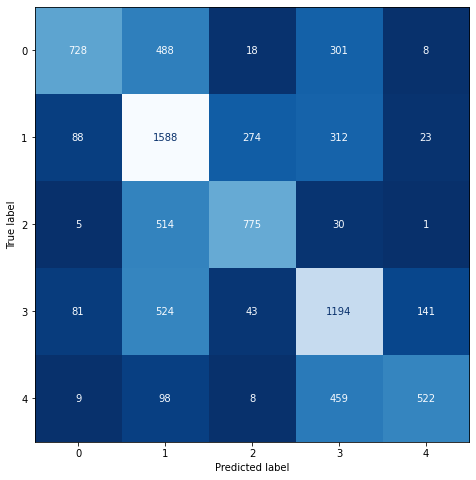

In [79]:
model(SVC())

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***